In [304]:
import pandas as pd
import numpy as np
import json
import re
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [305]:
df = pd.read_csv("lyrics.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [306]:
df = df.dropna()
df = df.loc[df['lyrics'] != "[Non-Lyrical Vocals]"]
df = df.loc[df['lyrics'] != '']

In [307]:
df.reset_index(drop=True, inplace=True)

In [308]:
song_lyrics = df['lyrics']

In [309]:
for i in range(len(song_lyrics)):
    song_lyrics[i] = re.sub("([a-z])([A-Z])", " \\1", str(song_lyrics[i])).strip()
    song_lyrics[i] = re.sub("[\(\[].*?[\)\]]", "", str(song_lyrics[i]))
    song_lyrics[i] = re.sub(r"\s*{.*}\s*", " ", str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].replace("\n", " ")
    song_lyrics[i] = re.sub(' +', ' ', str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].lower()

In [310]:
len(song_lyrics)

66

In [286]:
df['lyrics'] = song_lyrics

In [287]:
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += list("I")

In [288]:
flat_lyrics = " ".join(df['lyrics'].values)

In [289]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_lyrics = tokenizer.tokenize(flat_lyrics)

In [290]:
lyrics_no_stop_words = [word for word in tokenized_lyrics if word not in stop_words]

In [291]:
import matplotlib.pyplot as plt

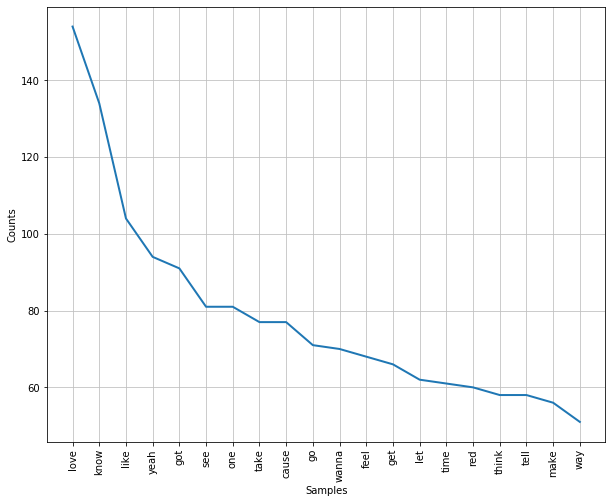

In [292]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(lyrics_no_stop_words).plot(20)
plt.show()

In [294]:
flat_lyrics = " ".join(df['lyrics'].values)

In [295]:
sid = SentimentIntensityAnalyzer()

In [296]:
for i in range(len(df)):
    sentiment = sid.polarity_scores(df.loc[i, 'lyrics'])
    df.loc[i, 'neg'] = sentiment['neg']
    df.loc[i, 'neu'] = sentiment['neu']
    df.loc[i, 'pos'] = sentiment['pos']
    df.loc[i, 'compound'] = sentiment['compound']

In [ ]:
df['sentiment'] = []

In [48]:
sample_tfidf = TfidfVectorizer(lowercase=True,
                              stop_words=stop_words,
                              tokenizer=tokenizer.tokenize,
                              min_df=1)

In [49]:
sample_sparse = sample_tfidf.fit_transform(song_lyrics)

In [50]:
sample_exp = pd.DataFrame(sample_sparse.toarray(), 
                        columns=sample_tfidf.get_feature_names())

sample_exp.head()

,aand,abloh,absurd,academy,accept,accepted,access,achieve,achieving,acrobat,...,yo,york,young,youthful,yuh,yumi,yungen,zing,zones,zoom
0,0.0,0.0,0.02173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
